In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

from Utilities import make_oh

/Users/edoardobucheli/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
y_train_2 = make_oh(y_train)
y_test_2 = make_oh(y_test)

In [4]:
x = tf.placeholder(dtype = tf.float32, shape = (None,28,28), name = 'x_input')
y = tf.placeholder(dtype = tf.float32, shape = (None,10), name = 'labels')

d_1 = tf.get_variable(name = 'dilation_1',dtype = tf.float32, initializer=tf.constant(0.2, dtype = tf.float32))
t_1 = tf.get_variable(name = 'translation_1', dtype = tf.float32, initializer=tf.constant(0.0, dtype = tf.float32))

#d_2 = tf.get_variable(name = 'dilation_2',dtype = tf.float32, initializer=tf.constant(0.2, dtype = tf.float32))
#t_2 = tf.get_variable(name = 'translation_2', dtype = tf.float32, initializer=tf.constant(0.0, dtype = tf.float32))

d_3 = tf.get_variable(name = 'dilation_3',dtype = tf.float32, initializer=tf.constant(0.2, dtype = tf.float32))
t_3 = tf.get_variable(name = 'translation_3', dtype = tf.float32, initializer=tf.constant(0.0, dtype = tf.float32))

In [5]:
def wavelet_act(x,d,t):
    x = tf.multiply(d,(x-t))
    return x*tf.exp(-0.5*x**2)

In [6]:
def mexican_hat_wt(x,d,t):
    x = (x-t)
    tf_pi = tf.constant(np.pi,dtype=tf.float32)
    #f = tf.constant(0.1, dtype = tf.float32)
    #return (1-x**2)*tf.exp(-x**2)
    return (1-2*(tf_pi**2)*(d**2)*(x**2))*tf.exp(-(tf_pi**2)*(d**2)*x**2)

In [7]:
#check_wt = mexican_hat_wt(x,d_1,t_1)

x_new = tf.expand_dims(x,axis = -1)

z_1 = tf.layers.conv2d(x_new,32,[3,3])
a_1 = mexican_hat_wt(z_1,d_1,t_1)

#z_2 = tf.layers.conv2d(a_1,64,[3,3])
#a_2 = mexican_hat_wt(z_2,d_2,t_2)

max_pool_1 = tf.layers.max_pooling2d(a_1,[2,2],[2,2])

flat = tf.layers.flatten(max_pool_1)

fc_z_1 = tf.layers.Dense(32,activation=None)(flat)
fc_a_1 = mexican_hat_wt(fc_z_1,d_3,t_3)


logits = tf.layers.Dense(10)(fc_a_1)
y_hat = tf.argmax(tf.nn.softmax(logits),axis = 1)

acc = tf.reduce_mean(tf.cast(tf.equal(y_hat,tf.argmax(y,axis = 1)),dtype = tf.float32))

In [8]:
loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits=logits)
optimizer = tf.train.AdamOptimizer()

tr_step = optimizer.minimize(loss)

In [9]:
iters = 500

In [ ]:
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for i in range(iters):
        this_acc,_ = sess.run([acc,tr_step],feed_dict = {x:x_train,y:y_train_2})
        
        if i%5 == 0:
            this_test_acc = sess.run(acc, feed_dict = {x:x_test,y:y_test_2})
            this_d, this_t = sess.run([d_1,t_1])
            print('It {:d}:\tTrain Acc {:02.2f}%\n\tTest Acc {:02.2f}%\n'.format(i,this_acc*100,this_test_acc*100))  
            print('d: {:01.2f}, t: {:01.2f}\n'.format(this_d,this_t))
        elif i == iters-1:
            this_test_acc = sess.run(acc, feed_dict = {x:x_test,y:y_test_2})
            this_d, this_t = sess.run([d_1,t_1])
            print('Final It:\tTrain Acc {:02.2f}%\n\tTest Acc {:02.2f}%'.format(this_acc*100,this_test_acc*100))  
            print('d: {:01.2f}, t: {:01.2f}\n'.format(this_d,this_t))
    
    #check_values = np.linspace(-10,10,num = 784)
    #check_values = np.reshape(check_values,(1,784))
    
    #edo = sess.run(check_wt,feed_dict = {x:check_values})

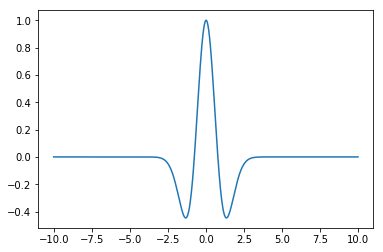

In [14]:
plt.plot(np.reshape(check_values,(784,)),np.reshape(edo,(784,)))